# Explaining market value of players using PDP
I am going to explain how features "Aggression", "Vision" affects players market predictions. I use fifa-23 dataset. Models that I use are Random Forest Regressor and MLP Regressor.

First model that I use is RandomForestRegressor. I have already used and shortly described in homework 1.


Coefficient of determination: 0.79
Scatter plot: predictions vs truth


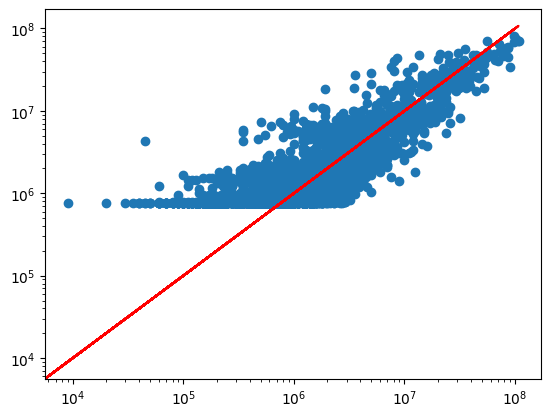

Calculating ceteris paribus: 100%|██████████| 62/62 [00:00<00:00, 177.24it/s]


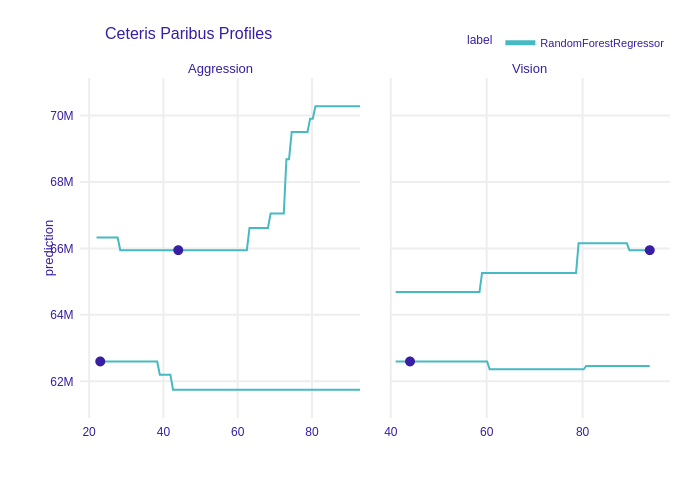

Calculating ceteris paribus: 100%|██████████| 2/2 [00:00<00:00, 59.67it/s]


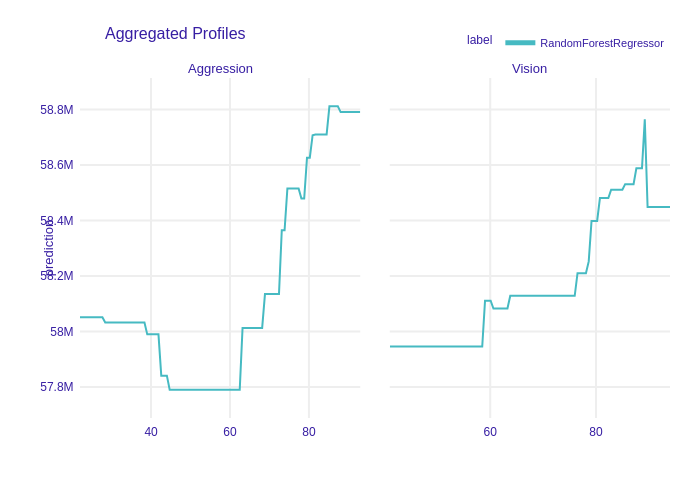

In [71]:
p1()

MLP - multi-layer perceptron is a neural network that consists of at least 3 layers. One layer usually consist of a linear and an activation.


In [ ]:
p2()

2. Ceteris Paribus explanations are calculated for the Random Forest model, players Messi, Courtois, and features 'Aggression' and 'Vision'. I chose these features at first because they seems to meet task conditions most likely to me.
3. As we can see, increasing 'Aggression' has a positive effect on first player's prediction and negative for second one.
4. Forest's CP claims that increasing 'Aggression' is usually good, but PDP shows that is not for a second player.
5. PDP between MLP and Random Forest are different. MLP's PDP claims that both increasing 'Vision' have linear negative effect on market value prediction and Forest's PDP for 'Vision' and 'Aggression looks more complicated.

In [68]:
from sklearn.model_selection import train_test_split
import pandas as pd
from matplotlib import pyplot as plt
import dalex as dx
import warnings
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
import plotly.io as pio
from IPython.display import display, Image
pio.renderers.default = "notebook"

warnings.filterwarnings("ignore")

def read_dataset():
    return pd.read_csv("archive/fifa.csv")


df = read_dataset()
y = df["Value(in Euro)"]

idx_1, idx_2 = 0, 6
name_1, name_2 = df["Known As"].iloc[idx_1],  df["Known As"].iloc[idx_2]

df = df[['Attacking Work Rate',
       'Defensive Work Rate', 'Pace Total', 'Shooting Total', 'Passing Total',
       'Dribbling Total', 'Defending Total', 'Physicality Total', 'Crossing',
       'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys',
       'Dribbling', 'Curve', 'Freekick Accuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'Standing Tackle', 'Sliding Tackle',
       'Goalkeeper Diving', 'Goalkeeper Handling', ' GoalkeeperKicking',
       'Goalkeeper Positioning', 'Goalkeeper Reflexes', 'Club Position']]

scale_mapper = {"Low":1, "Medium":2, "High":3}
df["Attacking Work Rate"].replace(scale_mapper, inplace=True)
df["Defensive Work Rate"].replace(scale_mapper, inplace=True)

one_hot = pd.get_dummies(df['Club Position'])
df = df.drop('Club Position',axis = 1)
df = df.join(one_hot)

X100 = df.iloc[:100].copy()
y100 = y.iloc[:100]
X_train, X_test, y_train, y_test = train_test_split(df, y)

In [69]:
def p1():
    regr = RandomForestRegressor(max_depth=5, random_state=0)
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_test)

    print("Coefficient of determination: {:.2f}".format(r2_score(y_test, y_pred)))

    print("Scatter plot: predictions vs truth")
    plt.scatter(y_test, y_pred)
    plt.plot(y_test, y_test, color='r')
    plt.yscale('log')
    plt.xscale('log')
    plt.show()

    dalex_explainer = dx.Explainer(regr, X100, y100, verbose=False)

    rf_pprofile = dalex_explainer.predict_profile(new_observation=X100.iloc[[idx_1, idx_2]])
    fig = rf_pprofile.plot(variables=['Aggression', 'Vision'], show=False)
    #fig.write_image('1.png')
    display(Image(filename='1.png'))
    lm_mprofile = dalex_explainer.model_profile(variables=["Aggression", "Vision"], type="partial")
    fig = lm_mprofile.plot(show=False)
    #fig.write_image('2.png')
    display(Image(filename='2.png'))

In [70]:
from sklearn.neural_network import MLPRegressor

def p2():
    regr = MLPRegressor(random_state=1, max_iter=1000, early_stopping=True,
                        hidden_layer_sizes=(64, 128, 128, 64), learning_rate_init=0.001,
                        learning_rate='invscaling')

    std_x, mean_x = X_train.std(axis=0), X_train.mean(axis=0)

    X_train_norm = ((X_train - mean_x) / std_x).values
    X_test_norm = ((X_test - mean_x) / std_x).values
    X100_norm = (X100 - mean_x) / std_x

    regr.fit(X_train_norm, y_train)
    y_pred = regr.predict(X_test_norm)
    print("Coefficient of determination: {:.2f}".format(r2_score(y_test, y_pred)))

    print("Scatter plot: predictions vs truth")
    plt.scatter(y_test, y_pred)
    plt.plot(y_test, y_test, color='r')
    plt.yscale('log')
    plt.xscale('log')
    plt.show()

    dalex_explainer = dx.Explainer(regr, X100_norm, y100, verbose=False)
    lm_mprofile = dalex_explainer.model_profile(variables=["Aggression", "Vision"], type="partial")
    fig = lm_mprofile.plot(show=False)
    #fig.write_image('3.png')
    display(Image(filename='3.png'))